In [217]:
from qiskit import *
import numpy as np

from qiskit.tools.visualization import plot_histogram
from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.visualization import plot_state_paulivec, plot_state_hinton
from qiskit.visualization import plot_state_qsphere
from qiskit.visualization import array_to_latex

In [218]:
def phi(x):
    phi = 2*np.arccos(1/(np.sqrt(x)))
    return phi

In [355]:
n_qubits = 4
qr = QuantumRegister(n_qubits, 'q')
cr = ClassicalRegister(n_qubits, 'c')
w_state = QuantumCircuit(qr,cr)


print(np.pi/2)

w_state.ry(phi(n_qubits), 0)

for i in range(n_qubits-2):
    x = n_qubits-(i+1)
    w_state.cry(phi(x),i, i+1)

for i in range(n_qubits-1):
    w_state.cx(n_qubits-(i+2), n_qubits-(i+1))

w_state.x(0)



w_state.draw()

1.5707963267948966


┌──────────┐                                        ┌───┐
q_0: ┤ Ry(2π/3) ├──────■──────────────────────────────■──┤ X ├
     └──────────┘┌─────┴──────┐                     ┌─┴─┐└───┘
q_1: ────────────┤ Ry(1.9106) ├─────■────────────■──┤ X ├─────
                 └────────────┘┌────┴────┐     ┌─┴─┐└───┘     
q_2: ──────────────────────────┤ Ry(π/2) ├──■──┤ X ├──────────
                               └─────────┘┌─┴─┐└───┘          
q_3: ─────────────────────────────────────┤ X ├───────────────
                                          └───┘               
c: 4/═════════════════════════════════════════════════════════

In [356]:
backend = BasicAer.get_backend('statevector_simulator')      # statevector simulator is the backend
result = execute(w_state, backend).result()                      # Run the circuit on the backend
psi  = result.get_statevector(w_state) 

array_to_latex(psi, max_size=2**n_qubits)


<IPython.core.display.Latex object>

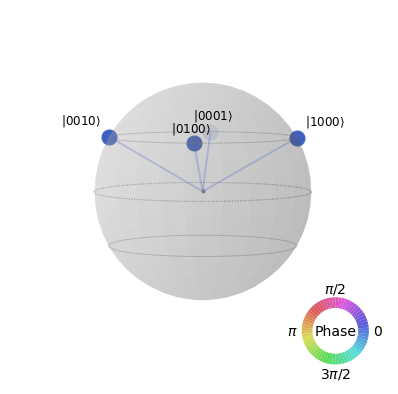

In [357]:
# Plotting the Bloch sphere
plot_state_qsphere(psi)


In [358]:
w_state.barrier()
w_state.measure([i for i in range(n_qubits)],[i for i in range(n_qubits)]);
w_state.draw()

┌──────────┐                                        ┌───┐ ░ ┌─┐         
q_0: ┤ Ry(2π/3) ├──────■──────────────────────────────■──┤ X ├─░─┤M├─────────
     └──────────┘┌─────┴──────┐                     ┌─┴─┐└───┘ ░ └╥┘┌─┐      
q_1: ────────────┤ Ry(1.9106) ├─────■────────────■──┤ X ├──────░──╫─┤M├──────
                 └────────────┘┌────┴────┐     ┌─┴─┐└───┘      ░  ║ └╥┘┌─┐   
q_2: ──────────────────────────┤ Ry(π/2) ├──■──┤ X ├───────────░──╫──╫─┤M├───
                               └─────────┘┌─┴─┐└───┘           ░  ║  ║ └╥┘┌─┐
q_3: ─────────────────────────────────────┤ X ├────────────────░──╫──╫──╫─┤M├
                                          └───┘                ░  ║  ║  ║ └╥┘
c: 4/═════════════════════════════════════════════════════════════╩══╩══╩══╩═
                                                                  0  1  2  3

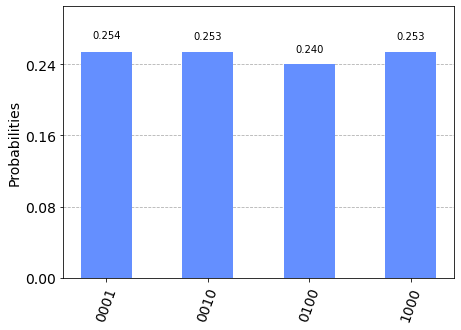

In [360]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(w_state, backend = simulator, shots = 8192).result()
counts = result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)